<a href="https://colab.research.google.com/github/raneemiir/airplane-shortest-path/blob/master/Copy_of_Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# 1. الاتصال بـ Google Drive
drive.mount('/content/drive', force_remount=True)
# 1. الاتصال بـ Google Drive

Mounted at /content/drive


In [ ]:
!pip install opendatasets

['Collecting opendatasets',
 '  Downloading opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.6)',
 'Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.17)',
 'Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)',
 'Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)',
 'Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.8.30)',
 'Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.32.3)',
 'Requirement already satisfied: python-slugi

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/phylake1337/fire-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raneemmoshai00
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset


100%|██████████| 387M/387M [00:13<00:00, 30.2MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [ ]:
# تحسين الأداء
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(150, 150, 3)),  # تحديد شكل الإدخال هنا باستخدام Input
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # أو 'binary_crossentropy' للتصنيف الثنائي
    metrics=['accuracy']
)


In [ ]:
epochs = 10

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [ ]:
import os
import pandas as pd

# Create an empty DataFrame
df = pd.DataFrame(columns=['path', 'label'])

# Define the path to the dataset
dataset_path = '/content/fire-dataset/fire_dataset'  # Modify if the folder is in a different location

# Loop over fire images and label them 1
for dirname, _, filenames in os.walk(os.path.join(dataset_path, 'fire_images')):
    for filename in filenames:
        # Use pd.concat() instead of append
        df = pd.concat([df, pd.DataFrame([[os.path.join(dirname, filename), 'fire']], columns=['path', 'label'])], ignore_index=True)

# Loop over non-fire images and label them 0
for dirname, _, filenames in os.walk(os.path.join(dataset_path, 'non_fire_images')):
    for filename in filenames:
        # Use pd.concat() instead of append
        df = pd.concat([df, pd.DataFrame([[os.path.join(dirname, filename), 'non_fire']], columns=['path', 'label'])], ignore_index=True)

# Shuffle the dataset for redistributing the labels
df = df.sample(frac=1).reset_index(drop=True)

# Display the first 10 rows
df.head(10)


,path,label
0,/content/fire-dataset/fire_dataset/fire_images...,fire
1,/content/fire-dataset/fire_dataset/non_fire_im...,non_fire
2,/content/fire-dataset/fire_dataset/fire_images...,fire
3,/content/fire-dataset/fire_dataset/fire_images...,fire
4,/content/fire-dataset/fire_dataset/fire_images...,fire
5,/content/fire-dataset/fire_dataset/fire_images...,fire
6,/content/fire-dataset/fire_dataset/fire_images...,fire
7,/content/fire-dataset/fire_dataset/fire_images...,fire
8,/content/fire-dataset/fire_dataset/non_fire_im...,non_fire
9,/content/fire-dataset/fire_dataset/fire_images...,fire


In [ ]:
fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

label = 'fire'  # Label for images with fire
data = df[df['label'] == label]

pics = 6  # Set the number of images to display

# Set a square figure size for better compactness
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(8, 8))  # Adjusted to be square-like
plt.suptitle('Images with Fire', fontsize=14, fontweight='bold')

# Flatten the axes to easily access them
ax = ax.ravel()

# Loop to display the images
for i in range(pics):
    path = data.sample(1).loc[:, 'path'].to_numpy()[0]
    img = image.load_img(path, target_size=(150, 150))  # Resize the images to be square
    img = image.img_to_array(img) / 255.0  # Normalize image

    # Show the image with added formatting for a cleaner look
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)  # Hide x-axis ticks
    ax[i].axes.yaxis.set_visible(False)  # Hide y-axis ticks
    ax[i].set_frame_on(False)  # Remove border around each image

    # Optional: Add a title for each image
    ax[i].set_title(f"Fire Image {i + 1}", fontsize=10, fontweight='bold', color='black')

# Adjust the layout for better spacing and tighter arrangement
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


NameError: name 'df' is not defined

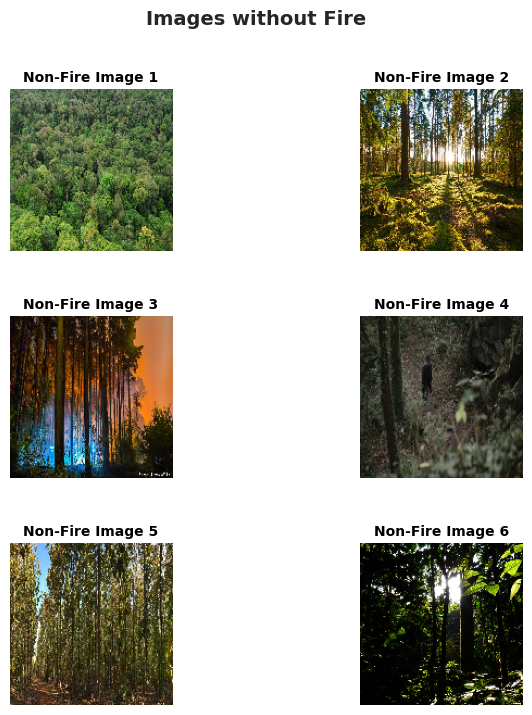

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

label = 'non_fire'  # Label for images without fire
data = df[df['label'] == label]

pics = 6  # Set the number of images to display

# Set a square figure size for better compactness
fig, ax = plt.subplots(int(pics // 2), 2, figsize=(8, 8))  # Adjusted to be square-like
plt.suptitle('Images without Fire', fontsize=14, fontweight='bold')

# Flatten the axes to easily access them
ax = ax.ravel()

# Loop to display the images
for i in range(pics):
    path = data.sample(1).loc[:, 'path'].to_numpy()[0]
    img = image.load_img(path, target_size=(150, 150))  # Resize the images to be square
    img = image.img_to_array(img) / 255.0  # Normalize image

    # Show the image with added formatting for a cleaner look
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)  # Hide x-axis ticks
    ax[i].axes.yaxis.set_visible(False)  # Hide y-axis ticks
    ax[i].set_frame_on(False)  # Remove border around each image

    # Optional: Add a title for each image
    ax[i].set_title(f"Non-Fire Image {i + 1}", fontsize=10, fontweight='bold', color='black')

# Adjust the layout for better spacing and tighter arrangement
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

NameError: name 'df' is not defined

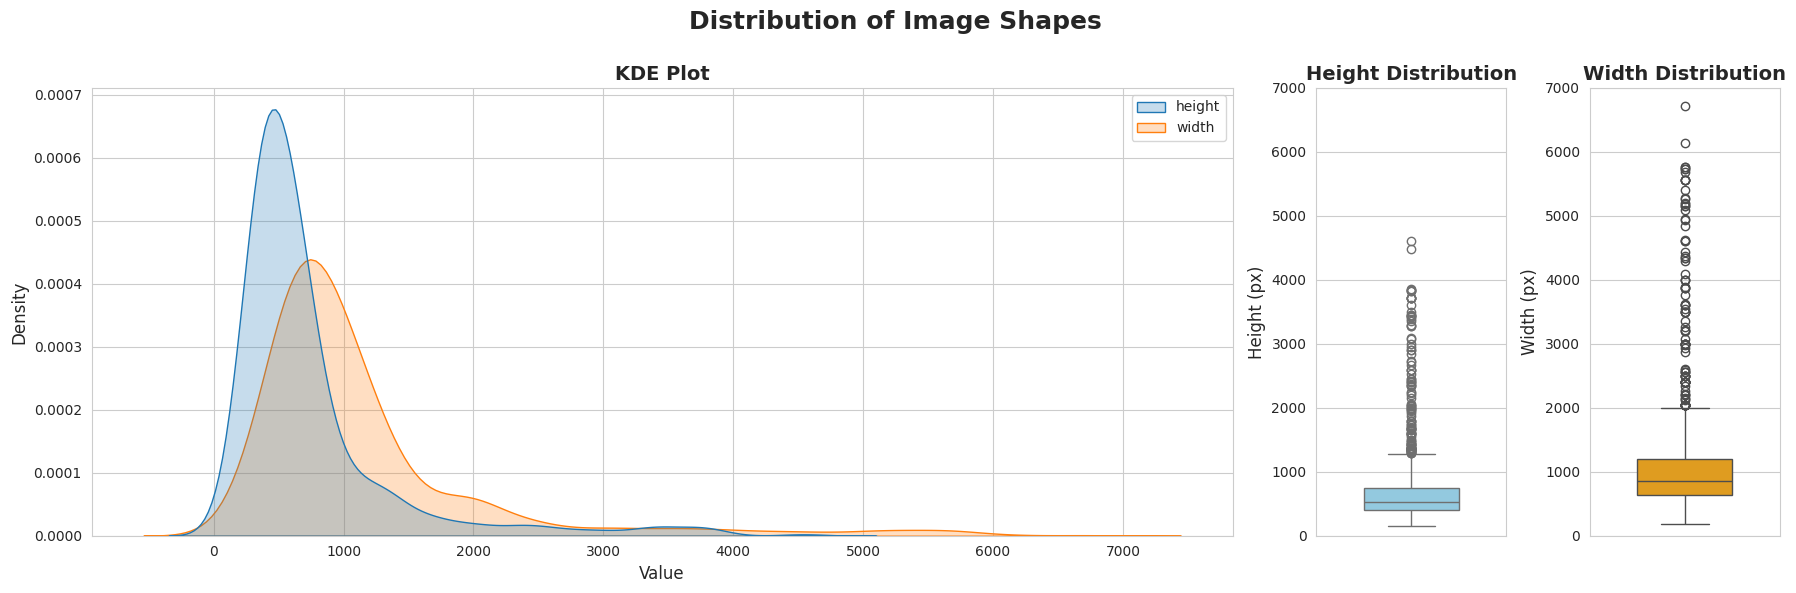

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more professional style for the plots
sns.set_style('whitegrid')

# Adjust figure size and spacing for a more polished look
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 0.5, 0.5]}, figsize=(18, 6))
plt.suptitle('Distribution of Image Shapes', fontsize=18, fontweight='bold')

# KDE Plot: Distribution of height and width (without path and label columns)
sns.kdeplot(data=df.drop(columns=['path', 'label']), ax=ax1, legend=True, color='royalblue', fill=True)  # Updated `shade` to `fill`
ax1.set_title('KDE Plot', fontsize=14, fontweight='bold')
ax1.set_xlabel('Value', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)

# Boxplot for height
sns.boxplot(data=df, y='height', ax=ax2, color='skyblue', width=0.5)
ax2.set_title('Height Distribution', fontsize=14, fontweight='bold')
ax2.set_ylabel('Height (px)', fontsize=12)
ax2.set_ylim(0, 7000)

# Boxplot for width
sns.boxplot(data=df, y='width', ax=ax3, color='orange', width=0.5)
ax3.set_title('Width Distribution', fontsize=14, fontweight='bold')
ax3.set_ylabel('Width (px)', fontsize=12)
ax3.set_ylim(0, 7000)

# Adjust layout for better visual balance
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjusting top space to prevent title overlap
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

{0: 'fire', 1: 'non_fire'}


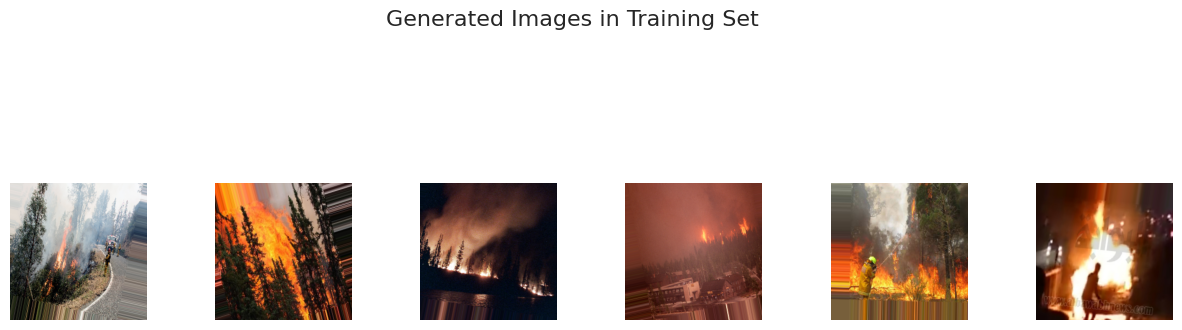

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better aesthetics
sns.set_style('darkgrid')

# Number of images to display
pics = 6

# Create a horizontal strip layout by adjusting the number of rows and columns
fig, ax = plt.subplots(1, pics, figsize=(15, 5))  # 1 row, 'pics' columns
plt.suptitle('Generated Images in Training Set', fontsize=16)

# Loop to display images
for i in range(pics):
    ax[i].imshow(train_gen[0][0][i])  # Show the image
    ax[i].axis('off')  # Hide axes for a cleaner look
    ax[i].set_title(f'Image {i+1}', fontsize=12, color='white')  # Add titles to each image

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.5)

# Display the images
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # Specify the input shape here as the first layer
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,916,257 (30.20 MB)

 Trainable params: 7,916,257 (30.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8360 - auc: 0.9373 - loss: 0.2890 - recall: 0.5782 - val_accuracy: 0.9045 - val_auc: 0.9666 - val_loss: 0.3424 - val_recall: 0.6122 - learning_rate: 0.0010
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 833ms/step - accuracy: 0.9123 - auc: 0.9653 - loss: 0.2341 - recall: 0.7865 - val_accuracy: 0.9598 - val_auc: 0.9923 - val_loss: 0.1230 - val_recall: 0.9796 - learning_rate: 0.0010
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 879ms/step - accuracy: 0.9525 - auc: 0.9738 - loss: 0.1529 - recall: 0.8954 - val_accuracy: 0.9447 - val_auc: 0.9896 - val_loss: 0.1309 - val_recall: 0.9796 - learning_rate: 0.0010
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 853ms/step - accuracy: 0.9598 - auc: 0.9925 - loss: 0.0878 - recall: 0.9235 - val_accuracy: 0.9347 - val_auc: 0.9914 - val_loss: 0.1218 - val_recall: 0.7959 - learning_rate: 0.0010
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 826ms/step - accuracy: 0.9574 - auc: 0.9925 - loss: 0.1003 - recall: 

In [ ]:
model.save('/content/drive/MyDrive/my_modelCNN.h5')  # حفظ النموذج في Google Drive
print("Model saved to Google Drive successfully!")


Model saved to Google Drive successfully!


In [ ]:
history= model.history.history
px.line(history,title = "Metrics Plot")

<class 'dict'>
{'accuracy': [0.8787500262260437, 0.9300000071525574, 0.9574999809265137, 0.9612500071525574, 0.9587500095367432, 0.9674999713897705, 0.9649999737739563, 0.96875, 0.9700000286102295, 0.9737499952316284, 0.9637500047683716, 0.9712499976158142, 0.9725000262260437, 0.9787499904632568, 0.9775000214576721], 'auc': [0.95392245054245, 0.968573808670044, 0.9823691844940186, 0.9920619130134583, 0.9887815713882446, 0.9912778735160828, 0.9916423559188843, 0.9925916790962219, 0.9890655279159546, 0.9916041493415833, 0.9879127740859985, 0.9930070638656616, 0.9921339154243469, 0.9962661266326904, 0.9965502023696899], 'loss': [0.23516634106636047, 0.1930757462978363, 0.1298108547925949, 0.09466227889060974, 0.1122426986694336, 0.08790352195501328, 0.08863711357116699, 0.07957763224840164, 0.10030246526002884, 0.0854504406452179, 0.12013019621372223, 0.0888555645942688, 0.08090078085660934, 0.06780260801315308, 0.06076822429895401], 'recall': [0.7538461685180664, 0.8461538553237915, 0.89

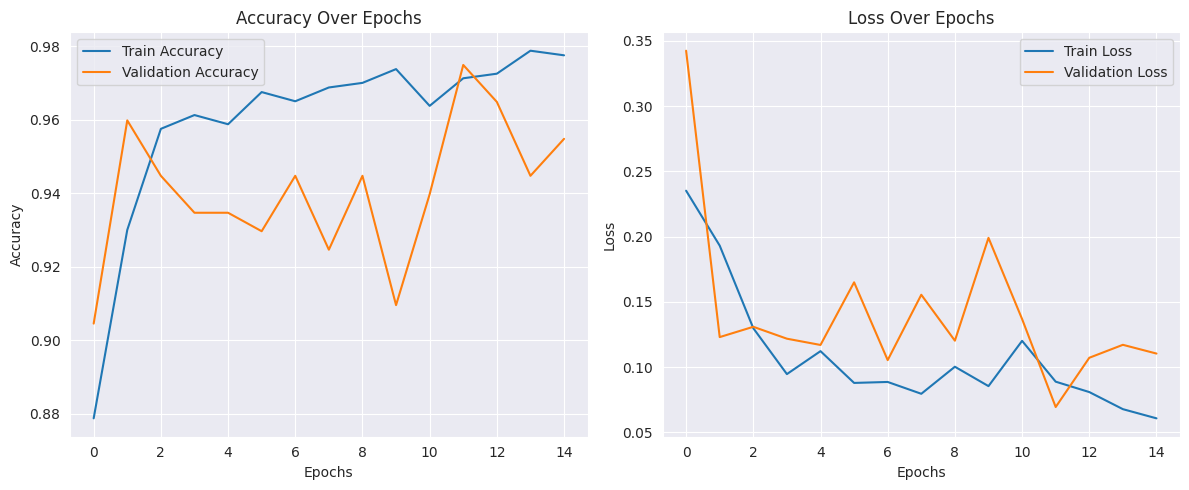

In [ ]:
# التحقق من history
print(type(history))
print(history)

# الرسم
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 812ms/step - accuracy: 0.9483 - auc: 0.9877 - loss: 0.1340 - recall: 0.8826
accuracy: 0.95
auc: 0.99
loss: 0.12
recall: 0.90


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# بناء النموذج CNN
cnn_input = Input(shape=(128, 128, 3))  # حجم الصورة
x = Conv2D(32, (3, 3), activation='relu')(cnn_input)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# تحميل نموذج Xception بدون الطبقات النهائية (include_top=False)
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
xception_out = xception_base.output
xception_out = GlobalAveragePooling2D()(xception_out)

# دمج مخرجات CNN و Xception
merged = Concatenate()([x, xception_out])

# إضافة طبقة كاملة (Dense) بعد الدمج
output = Dense(1, activation='sigmoid')(merged)

# بناء النموذج النهائي
model = Model(inputs=cnn_input, outputs=output)

# تجميع النموذج
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج للتأكد من الشكل النهائي
model.summary()



Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 63, 63, 32)     │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 63, 63, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 63, 63, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 61, 61, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 61, 61, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 61, 61, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 61, 61, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 61, 61, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 61, 61, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 61, 61, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 61, 61, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 31, 31, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 31, 31, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,940,521 (79.88 MB)

 Trainable params: 20,885,993 (79.67 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# تحميل المودل المحفوظ
model2 = load_model('/content/drive/MyDrive/my_modelCNN.h5')  # تأكد من المسار الصحيح للمودل

# إعادة تجميع النموذج باستخدام محسن جديد إذا لم تقم بتجميعه مسبقاً
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# تنفيذ تقييم أولي لضمان بناء المقاييس (metrics)
val_loss, val_accuracy = model2.evaluate(val_gen)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# إعداد الـ callbacks
early_stoppping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# استئناف التدريب
history2 = model2.fit(
    x=train_gen,  # بيانات التدريب
    batch_size=32,  # حجم الدفعة
    epochs=15,  # عدد الفترات الإضافية
    callbacks=[early_stoppping, reduce_lr_on_plateau],  # الـ callbacks
    validation_data=val_gen  # بيانات التقييم
)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 775ms/step - accuracy: 0.9569 - loss: 0.1003
Validation Loss: 0.1066
Validation Accuracy: 0.9497
Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 919ms/step - accuracy: 0.9579 - loss: 0.1335 - val_accuracy: 0.9548 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 866ms/step - accuracy: 0.9715 - loss: 0.0759 - val_accuracy: 0.9497 - val_loss: 0.1242 - learning_rate: 0.0010
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 860ms/step - accuracy: 0.9761 - loss: 0.0828 - val_accuracy: 0.9648 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 834ms/step - accuracy: 0.9807 - loss: 0.0486 - val_accuracy: 0.9648 - val_loss: 0.0892 - learning_rate: 0.0010
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 816ms/step - accuracy: 0.9804 - loss: 0.0526 - val_accuracy: 0.9648 - val_loss: 0.1029 - learning_rate: 0.0010
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 828ms/step - accuracy: 0.9722 - loss: 0.0689 - val_accuracy: 0.9447 

In [ ]:
model.save('/content/drive/MyDrive/my_modelXception.keras')  # لحفظ النموذج بصيغة Keras الجديدة


In [ ]:
px.line(history,title='Metrics Plot')

<class 'dict'>
{'accuracy': [0.8787500262260437, 0.9300000071525574, 0.9574999809265137, 0.9612500071525574, 0.9587500095367432, 0.9674999713897705, 0.9649999737739563, 0.96875, 0.9700000286102295, 0.9737499952316284, 0.9637500047683716, 0.9712499976158142, 0.9725000262260437, 0.9787499904632568, 0.9775000214576721], 'auc': [0.95392245054245, 0.968573808670044, 0.9823691844940186, 0.9920619130134583, 0.9887815713882446, 0.9912778735160828, 0.9916423559188843, 0.9925916790962219, 0.9890655279159546, 0.9916041493415833, 0.9879127740859985, 0.9930070638656616, 0.9921339154243469, 0.9962661266326904, 0.9965502023696899], 'loss': [0.23516634106636047, 0.1930757462978363, 0.1298108547925949, 0.09466227889060974, 0.1122426986694336, 0.08790352195501328, 0.08863711357116699, 0.07957763224840164, 0.10030246526002884, 0.0854504406452179, 0.12013019621372223, 0.0888555645942688, 0.08090078085660934, 0.06780260801315308, 0.06076822429895401], 'recall': [0.7538461685180664, 0.8461538553237915, 0.89

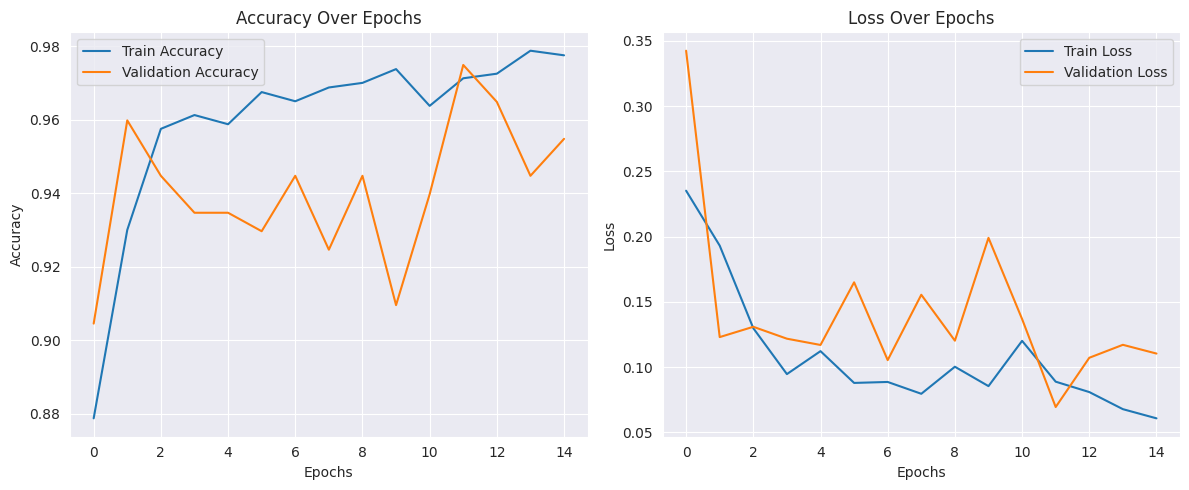

In [ ]:
# التحقق من history
print(type(history))
print(history)

# الرسم
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# تعريف ImageDataGenerator لبيانات الاختبار
test_datagen = ImageDataGenerator(rescale=1./255)

# المسار لمجلد البيانات الاختبارية
test_dir = '/path/to/your/test_data'  # قم بتعديل المسار لبياناتك الخاصة

# تعريف مولد بيانات الاختبار
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # حجم الصورة الذي يحتاجه النموذج
    batch_size=32,  # عدد الصور في كل دفعة
    class_mode='binary',  # لأننا نتعامل مع تصنيف ثنائي (نار / لا نار)
    shuffle=False  # لا نريد خلط البيانات أثناء التقييم
)

# تقييم النموذج باستخدام مجموعة الاختبار
val_loss, val_accuracy = model.evaluate(test_gen)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
#Downloading the image
!curl https://new-girls.ws/wp-content/uploads/2015/03/131801076414.jpg --output predict11.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94966  100 94966    0     0   696k      0 --:--:-- --:--:-- --:--:--  702k


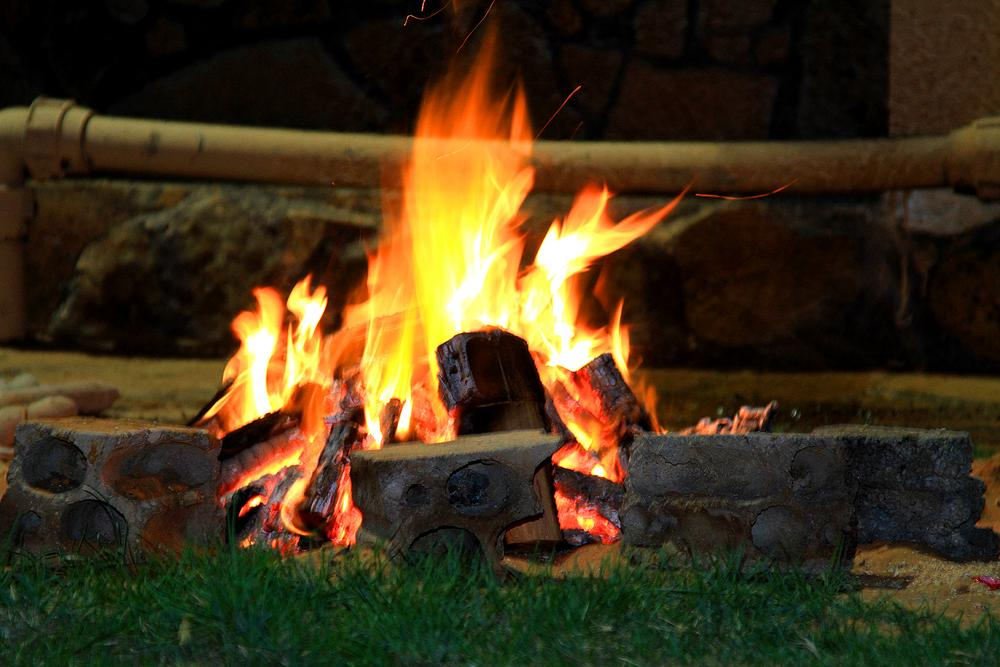

In [ ]:
#loading the image
img = image.load_img('/content/predict11.jpg')
img

In [ ]:
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [ ]:
prediction = int(tf.round(model2.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
The predicted value is:  0 and the predicted label is: fire
